In [105]:
#Importacion de librerias  pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [106]:
#Cargar archivo xlsx 
data =pd.read_csv('Mexico_limpio.csv')

In [107]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.1                 26582 non-null  int64  
 1   Unnamed: 0                   26582 non-null  int64  
 2   id                           26582 non-null  float64
 3   name                         26582 non-null  object 
 4   description                  26582 non-null  object 
 5   neighborhood_overview        26582 non-null  object 
 6   host_id                      26582 non-null  int64  
 7   host_name                    26582 non-null  object 
 8   host_since                   26582 non-null  object 
 9   host_location                26582 non-null  object 
 10  host_response_rate           26582 non-null  object 
 11  host_acceptance_rate         26582 non-null  object 
 12  neighbourhood                26582 non-null  object 
 13  property_type   

In [108]:
#Imprimo los primeros cinco registros del DataFrame
data.head(5)

Unnamed: 0.1  Unnamed: 0        id  \
0             0           0   35797.0   
1             1           1   44616.0   
2             2           2   67703.0   
3             3           3   70644.0   
4             4           4  107078.0   

                                               name  \
0                                       Villa Dante   
1                                      Condesa Haus   
2                 2 bedroom apt. deco bldg, Condesa   
3  Beautiful light Studio Coyoacan- full equipped !   
4                                NEW  DESIGNER LOFT   

                                         description  \
0  Dentro de Villa un estudio de arte con futon, ...   
1  A new concept of hosting in mexico through a b...   
2  Comfortably furnished, sunny, 2 bedroom apt., ...   
3  COYOACAN designer studio quiet & safe! well eq...   
4  Is the best ever place triple L <br />Location...   

                               neighborhood_overview  host_id host_name  \
0  Santa Fe Mall, Interloma Park and the Lion Des...   153786      Dici   
1                                      No disponible   196253  Fernando   
2                                      No disponible   334451  Nicholas   
3  Coyoacan is a beautiful neighborhood famous fo...   212109    Trisha   
4  Is located in the best area of Mexico City, Po...   540705    Andrea   

   host_since        host_location  ... reviews_per_month host_neighbourhood  \
0  28/06/2010  Mexico City, Mexico  ...              1.74                NaN   
1  09/08/2010  Mexico City, Mexico  ...              0.41            Condesa   
2  04/01/2011  Mexico City, Mexico  ...              0.31          Hipódromo   
3  24/08/2010  Mexico City, Mexico  ...              0.83           Coyoacán   
4  27/04/2011  Mexico City, Mexico  ...              0.11           Coyoacán   

  neighbourhood_cleansed           source  host_response_time  \
0  Cuajimalpa de Morelos      city scrape  within a few hours   
1             Cuauhtémoc      city scrape      within an hour   
2             Cuauhtémoc      city scrape  within a few hours   
3               Coyoacán      city scrape      within an hour   
4               Coyoacán  previous scrape  within a few hours   

                 host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'work_email']                    t   
1  ['email', 'phone', 'work_email']                    t   
2                ['email', 'phone']                    t   
3  ['email', 'phone', 'work_email']                    t   
4                         ['phone']                    t   

  host_identity_verified  instant_bookable  host_total_listings_count  
0                      t                 f                        1.0  
1                      t                 f                       13.0  
2                      t                 f                        4.0  
3                      t                 f                        4.0  
4                      f                 f                        4.0  

[5 rows x 56 columns]

In [109]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(data)

                                                    name  frequency  \
0         Blueground | Roma Sur 1 recamara, AC & rooftop         57   
1                          Blueground | Polanco, parking         49   
2                       Perfecto Loft en gran ubicaciÃ³n         48   
3      Blueground | Amueblado, Security & Business Ce...         36   
4                               Casa Miravalle | Condesa         21   
...                                                  ...        ...   
25163  Private suite in Condesa Great internet & loca...          1   
25164        Artsy habitaciÃ³n frente al Parque MÃ©xico!          1   
25165  LOFT 14 (Parque Delta, Hosp. siglo XXI, Foro Sol)          1   
25166           Apartamento Embajada Las Garzas Cozy&Zen          1   
25167                   Pretty, well centered, amenities          1   

       percentage  cumulative_perc  
0        0.002144         0.002144  
1        0.001843         0.003988  
2        0.001806         0.005793  

In [110]:
# Eliminar % y convertir a número
data["host_response_rate"] = data["host_response_rate"].str.replace('%', '', regex=True).astype(float) / 100  

In [111]:
# Contar solo los valores no nulo
n = data["host_response_rate"].dropna().shape[0]
n

26582

In [112]:
data['host_response_rate'].info()
n=26582

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [113]:
Min = data["host_response_rate"].min()  
Max = data["host_response_rate"].max()  
Limites = [Min,Max]
Limites

[0.0, 1.0]

In [114]:
R = Max - Min
R

1.0

In [115]:
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [116]:
i = R/ni
i

0.06373636189094067

**Creación de Categorias a partir de clases**

In [117]:
# Ver resultado
intervalos = np.linspace(0.0, 1.1, 12) #Número de clases más uno
intervalos

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1])

In [118]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [119]:
data["host_response_rate"] = pd.cut(x = data["host_response_rate"], bins = intervalos, labels = categorias)
data["host_response_rate"]

0                NaN
1        Categoría10
2         Categoría8
3        Categoría10
4        Categoría10
            ...     
26577    Categoría10
26578    Categoría10
26579    Categoría10
26580    Categoría10
26581    Categoría10
Name: host_response_rate, Length: 26582, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [120]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["host_response_rate"])
data1

host_response_rate  frequency  percentage  cumulative_perc
0         Categoría10      23146    0.870740         0.892600
1          Categoría9       1105    0.041569         0.935213
2          Categoría8        459    0.017267         0.952914
3          Categoría7        278    0.010458         0.963634
4          Categoría5        262    0.009856         0.973738
5          Categoría1        181    0.006809         0.980718
6          Categoría4        160    0.006019         0.986888
7          Categoría6        123    0.004627         0.991632
8          Categoría2        115    0.004326         0.996066
9          Categoría3        102    0.003837         1.000000
10        Categoría11          0    0.000000         1.000000

In [121]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table1 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table1

host_response_rate  frequency
0         Categoría10      23146
1          Categoría9       1105
2          Categoría8        459
3          Categoría7        278
4          Categoría5        262
5          Categoría1        181
6          Categoría4        160
7          Categoría6        123
8          Categoría2        115
9          Categoría3        102
10        Categoría11          0

In [122]:
filtro = table1[table1['frequency'] > 1000]
filtro

host_response_rate  frequency
0        Categoría10      23146
1         Categoría9       1105

In [123]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro.set_index("host_response_rate")
Filtro_index

frequency
host_response_rate           
Categoría10             23146
Categoría9               1105

Text(0, 0.5, 'Frecuencia')

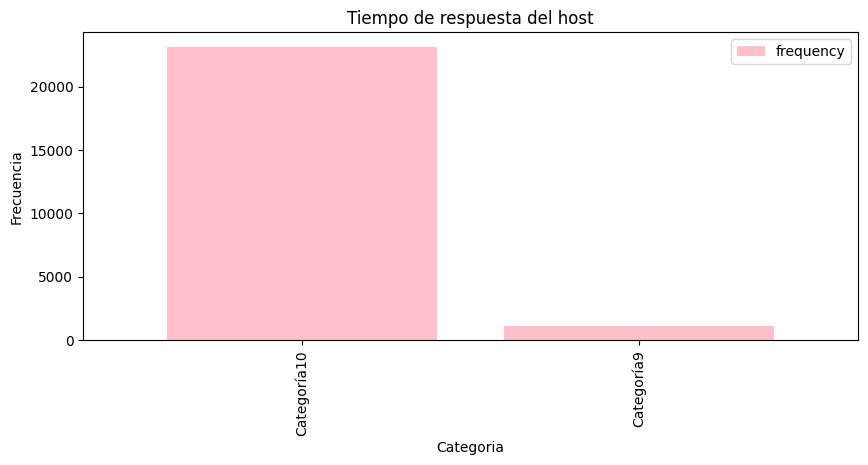

In [124]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "pink")
plt.title('Tiempo de respuesta del host')
plt.xlabel('Categoria')
plt.ylabel('Frecuencia')

In [125]:
# Eliminar % y convertir a número
data["host_acceptance_rate"] = data["host_acceptance_rate"].str.replace('%', '', regex=True).astype(float) / 100  

In [126]:
Min = data["host_acceptance_rate"].min()  
Max = data["host_acceptance_rate"].max()  
Limites = [Min,Max]
Limites

[0.0, 1.0]

In [127]:
#Calcula el rango
R = Max - Min
R

1.0

In [128]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [129]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.06373636189094067

In [130]:
# Ver resultado
intervalos = np.linspace(0.0, 1.0, 16) #Número de clases más uno
intervalos

array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
       1.        ])

In [131]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11","Categoría12",
              "Categoría13","Categoría14","Categoría15"]


In [132]:
data["host_acceptance_rate"] = pd.cut(x = data["host_acceptance_rate"], bins = intervalos, labels = categorias)
data["host_acceptance_rate"]

0        Categoría14
1        Categoría14
2         Categoría9
3        Categoría15
4        Categoría15
            ...     
26577    Categoría15
26578    Categoría15
26579    Categoría15
26580    Categoría15
26581    Categoría15
Name: host_acceptance_rate, Length: 26582, dtype: category
Categories (15, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría12' < 'Categoría13' < 'Categoría14' < 'Categoría15']

In [133]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["host_acceptance_rate"])
data1

host_acceptance_rate  frequency  percentage  cumulative_perc
0           Categoría15      20199    0.759875         0.790258
1           Categoría14       1619    0.060906         0.853599
2           Categoría13        841    0.031638         0.886502
3           Categoría12        648    0.024377         0.911854
4           Categoría11        558    0.020992         0.933685
5            Categoría8        404    0.015198         0.949491
6            Categoría5        346    0.013016         0.963028
7            Categoría9        216    0.008126         0.971479
8           Categoría10        167    0.006282         0.978013
9            Categoría6        142    0.005342         0.983568
10           Categoría3        115    0.004326         0.988067
11           Categoría4        107    0.004025         0.992254
12           Categoría7         98    0.003687         0.996088
13           Categoría2         81    0.003047         0.999257
14           Categoría1         19    0.000715         1.000000

In [134]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table2 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

host_acceptance_rate  frequency
0           Categoría15      20199
1           Categoría14       1619
2           Categoría13        841
3           Categoría12        648
4           Categoría11        558
5            Categoría8        404
6            Categoría5        346
7            Categoría9        216
8           Categoría10        167
9            Categoría6        142
10           Categoría3        115
11           Categoría4        107
12           Categoría7         98
13           Categoría2         81
14           Categoría1         19

In [135]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table2 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

host_acceptance_rate  frequency
0           Categoría15      20199
1           Categoría14       1619
2           Categoría13        841
3           Categoría12        648
4           Categoría11        558
5            Categoría8        404
6            Categoría5        346
7            Categoría9        216
8           Categoría10        167
9            Categoría6        142
10           Categoría3        115
11           Categoría4        107
12           Categoría7         98
13           Categoría2         81
14           Categoría1         19

In [136]:
filtro2 = table2[table2['frequency'] > 500]
filtro2

host_acceptance_rate  frequency
0          Categoría15      20199
1          Categoría14       1619
2          Categoría13        841
3          Categoría12        648
4          Categoría11        558

In [137]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro2.set_index("host_acceptance_rate")
Filtro_index

frequency
host_acceptance_rate           
Categoría15               20199
Categoría14                1619
Categoría13                 841
Categoría12                 648
Categoría11                 558

<Axes: xlabel='host_acceptance_rate'>

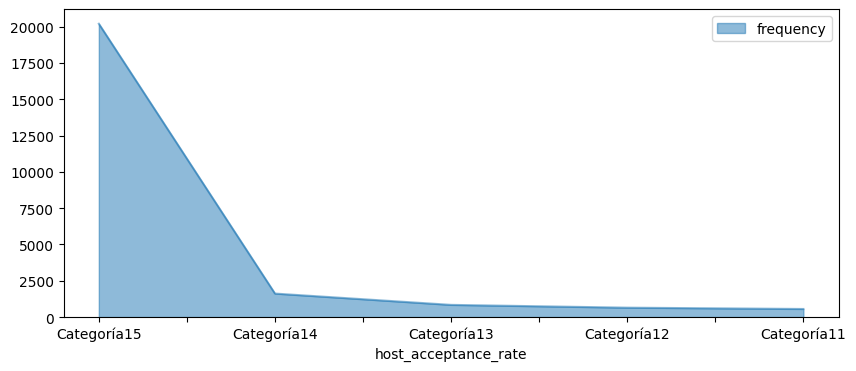

In [138]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha = 0.5)

In [139]:
Min = data["host_total_listings_count"].min()  
Max = data["host_total_listings_count"].max()  
Limites = [Min,Max]
Limites

[1.0, 8059.0]

In [140]:
#Calcula el rango
R = Max - Min
R

8058.0

In [141]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [142]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

513.5876041171999

In [143]:
# Ver resultado
intervalos = np.linspace(1, 7324, 16) #Número de clases más uno
intervalos

array([1.0000e+00, 4.8920e+02, 9.7740e+02, 1.4656e+03, 1.9538e+03,
       2.4420e+03, 2.9302e+03, 3.4184e+03, 3.9066e+03, 4.3948e+03,
       4.8830e+03, 5.3712e+03, 5.8594e+03, 6.3476e+03, 6.8358e+03,
       7.3240e+03])

In [144]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11","Categoría12",
              "Categoría13","Categoría14","Categoría15"]

In [145]:
data["host_total_listings_count"] = pd.cut(x = data["host_total_listings_count"], bins = intervalos, labels = categorias)
data["host_total_listings_count"]

0               NaN
1        Categoría1
2        Categoría1
3        Categoría1
4        Categoría1
            ...    
26577           NaN
26578           NaN
26579           NaN
26580           NaN
26581           NaN
Name: host_total_listings_count, Length: 26582, dtype: category
Categories (15, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría12' < 'Categoría13' < 'Categoría14' < 'Categoría15']

In [146]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["host_total_listings_count"])
data1

host_total_listings_count  frequency  percentage  cumulative_perc
0                 Categoría1      20913    0.786735         0.981232
1                 Categoría2        400    0.015048         1.000000
2                 Categoría3          0    0.000000         1.000000
3                 Categoría4          0    0.000000         1.000000
4                 Categoría5          0    0.000000         1.000000
5                 Categoría6          0    0.000000         1.000000
6                 Categoría7          0    0.000000         1.000000
7                 Categoría8          0    0.000000         1.000000
8                 Categoría9          0    0.000000         1.000000
9                Categoría10          0    0.000000         1.000000
10               Categoría11          0    0.000000         1.000000
11               Categoría12          0    0.000000         1.000000
12               Categoría13          0    0.000000         1.000000
13               Categoría14          0    0.000000         1.000000
14               Categoría15          0    0.000000         1.000000

In [147]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table3 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table3

host_total_listings_count  frequency
0                 Categoría1      20913
1                 Categoría2        400
2                 Categoría3          0
3                 Categoría4          0
4                 Categoría5          0
5                 Categoría6          0
6                 Categoría7          0
7                 Categoría8          0
8                 Categoría9          0
9                Categoría10          0
10               Categoría11          0
11               Categoría12          0
12               Categoría13          0
13               Categoría14          0
14               Categoría15          0

In [148]:
filtro3 = table3[table3['frequency'] > 10]
filtro3

host_total_listings_count  frequency
0                Categoría1      20913
1                Categoría2        400

In [149]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro3.set_index("host_total_listings_count")
Filtro_index

frequency
host_total_listings_count           
Categoría1                     20913
Categoría2                       400

Text(0, 0.5, 'Frecuencia')

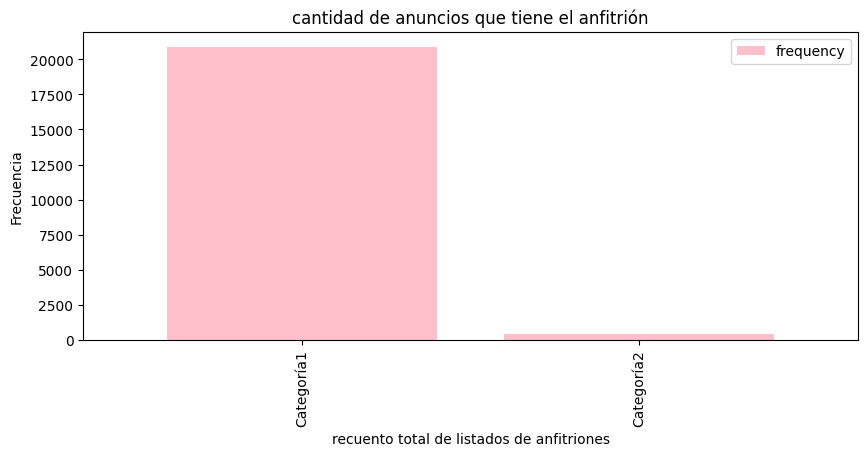

In [150]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "pink")
plt.title('cantidad de anuncios que tiene el anfitrión')
plt.xlabel('recuento total de listados de anfitriones')
plt.ylabel('Frecuencia')

In [151]:
Min = data["accommodates"].min()  
Max = data["accommodates"].max()  
Limites = [Min,Max]
Limites

[1.0, 7.0]

In [152]:
#Calcula el rango
R = Max - Min
R

6.0

In [153]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [154]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.38241817134564404

In [155]:
# Ver resultado
intervalos = np.linspace(1, 16, 12) #Número de clases más uno
intervalos

array([ 1.        ,  2.36363636,  3.72727273,  5.09090909,  6.45454545,
        7.81818182,  9.18181818, 10.54545455, 11.90909091, 13.27272727,
       14.63636364, 16.        ])

In [156]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [157]:
data["accommodates"] = pd.cut(x = data["accommodates"], bins = intervalos, labels = categorias)
data["accommodates"]

0        Categoría1
1        Categoría2
2        Categoría3
3        Categoría1
4        Categoría1
            ...    
26577    Categoría3
26578    Categoría1
26579    Categoría1
26580    Categoría1
26581    Categoría1
Name: accommodates, Length: 26582, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [158]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["accommodates"])
data1

accommodates  frequency  percentage  cumulative_perc
0    Categoría1      10620    0.399518         0.450975
1    Categoría3       7065    0.265781         0.750987
2    Categoría2       3753    0.141186         0.910357
3    Categoría4       1800    0.067715         0.986793
4    Categoría5        311    0.011700         1.000000
5    Categoría6          0    0.000000         1.000000
6    Categoría7          0    0.000000         1.000000
7    Categoría8          0    0.000000         1.000000
8    Categoría9          0    0.000000         1.000000
9   Categoría10          0    0.000000         1.000000
10  Categoría11          0    0.000000         1.000000

In [159]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table4 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table4

accommodates  frequency
0    Categoría1      10620
1    Categoría3       7065
2    Categoría2       3753
3    Categoría4       1800
4    Categoría5        311
5    Categoría6          0
6    Categoría7          0
7    Categoría8          0
8    Categoría9          0
9   Categoría10          0
10  Categoría11          0

In [160]:
filtro4 = table4[table4['frequency'] > 500]
filtro4

accommodates  frequency
0   Categoría1      10620
1   Categoría3       7065
2   Categoría2       3753
3   Categoría4       1800

In [161]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro4.set_index("accommodates")
Filtro_index

frequency
accommodates           
Categoría1        10620
Categoría3         7065
Categoría2         3753
Categoría4         1800

<Axes: ylabel='frequency'>

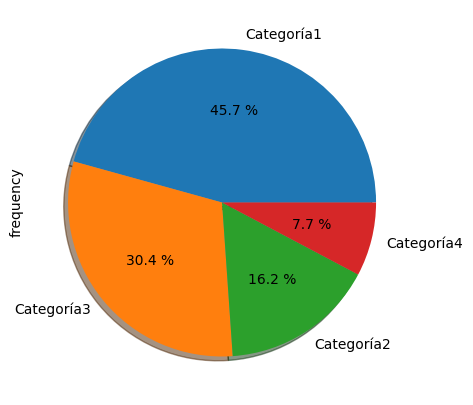

In [162]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

---------------------------------------------------------------------------------------------------------------------------

In [163]:
n = data['bathrooms_text'].dropna().shape[0]
n

26582

In [164]:
data['bathrooms_numeric'] = data['bathrooms_text'].astype(str).str.extract(r'(\d+)').astype(float)


In [165]:
# Filtrar valores 0.0
data = data[data['bathrooms_numeric'] != 0.0]

In [166]:
Min = data['bathrooms_numeric'].min()  
Max = data['bathrooms_numeric'].max()  
Limites = [Min,Max]
Limites


[1.0, 49.0]

In [167]:
#Calcula el rango
R = Max - Min
R

48.0

-----------------------------------------

In [168]:
data['beds'].info()
n=26582

<class 'pandas.core.series.Series'>
Index: 26482 entries, 0 to 26581
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
26482 non-null  float64
dtypes: float64(1)
memory usage: 413.8 KB


In [169]:
Min = data["beds"].min()  
Max = data["beds"].max()  
Limites = [Min,Max]
Limites

[0.0, 3.0]

In [170]:
#Calcula el rango
R = Max - Min
R

3.0

In [171]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [172]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.19120908567282202

In [173]:
# Ver resultado
intervalos = np.linspace(0, 50, 16) #Número de clases más uno
intervalos

array([ 0.        ,  3.33333333,  6.66666667, 10.        , 13.33333333,
       16.66666667, 20.        , 23.33333333, 26.66666667, 30.        ,
       33.33333333, 36.66666667, 40.        , 43.33333333, 46.66666667,
       50.        ])

In [174]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11","Categoría12",
              "Categoría13","Categoría14","Categoría15"]

In [175]:
data["beds"] = pd.cut(x = data["beds"], bins = intervalos, labels = categorias)
data["beds"]


0        Categoría1
1        Categoría1
2        Categoría1
3        Categoría1
4        Categoría1
            ...    
26577    Categoría1
26578    Categoría1
26579    Categoría1
26580    Categoría1
26581    Categoría1
Name: beds, Length: 26482, dtype: category
Categories (15, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría12' < 'Categoría13' < 'Categoría14' < 'Categoría15']

In [176]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["beds"])
data1

beds  frequency  percentage  cumulative_perc
0    Categoría1      26016    0.982403              1.0
1    Categoría2          0    0.000000              1.0
2    Categoría3          0    0.000000              1.0
3    Categoría4          0    0.000000              1.0
4    Categoría5          0    0.000000              1.0
5    Categoría6          0    0.000000              1.0
6    Categoría7          0    0.000000              1.0
7    Categoría8          0    0.000000              1.0
8    Categoría9          0    0.000000              1.0
9   Categoría10          0    0.000000              1.0
10  Categoría11          0    0.000000              1.0
11  Categoría12          0    0.000000              1.0
12  Categoría13          0    0.000000              1.0
13  Categoría14          0    0.000000              1.0
14  Categoría15          0    0.000000              1.0

In [177]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table5 = data1.drop(['percentage'], axis=1)
table5

beds  frequency  cumulative_perc
0    Categoría1      26016              1.0
1    Categoría2          0              1.0
2    Categoría3          0              1.0
3    Categoría4          0              1.0
4    Categoría5          0              1.0
5    Categoría6          0              1.0
6    Categoría7          0              1.0
7    Categoría8          0              1.0
8    Categoría9          0              1.0
9   Categoría10          0              1.0
10  Categoría11          0              1.0
11  Categoría12          0              1.0
12  Categoría13          0              1.0
13  Categoría14          0              1.0
14  Categoría15          0              1.0

In [178]:
filtro5 = table5[table5['frequency'] > 300]
filtro5

beds  frequency  cumulative_perc
0  Categoría1      26016              1.0

In [179]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro5.set_index("beds")
Filtro_index

frequency  cumulative_perc
beds                                  
Categoría1      26016              1.0

<Axes: ylabel='frequency'>

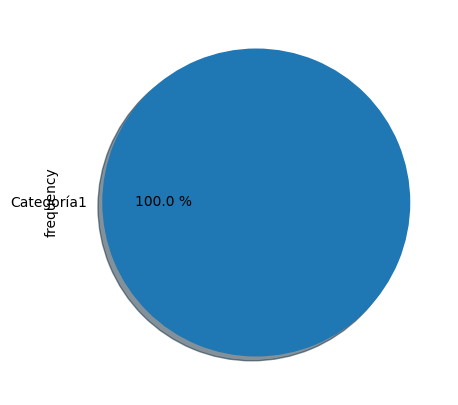

In [180]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [181]:
data['price'].info()
n=26582

<class 'pandas.core.series.Series'>
Index: 26482 entries, 0 to 26581
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
26482 non-null  object
dtypes: object(1)
memory usage: 413.8+ KB


In [182]:
# Eliminar caracteres no numéricos ($, ,)
data["price"] = data["price"].str.replace("[$,]", "", regex=True)

# Convertir a número
data["price"] = pd.to_numeric(data["price"], errors="coerce")

In [183]:
Min = data["price"].min()  
Max = data["price"].max()  
Limites = [Min,Max]
Limites

[0.0, 429081.0]

In [184]:
#Calcula el rango
R = Max - Min
R

429081.0

In [185]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [186]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

27348.061896526713

In [187]:
# Ver resultado
intervalos = np.linspace(0.0,435481.0, 16) #Número de clases más uno
intervalos

array([     0.        ,  29032.06666667,  58064.13333333,  87096.2       ,
       116128.26666667, 145160.33333333, 174192.4       , 203224.46666667,
       232256.53333333, 261288.6       , 290320.66666667, 319352.73333333,
       348384.8       , 377416.86666667, 406448.93333333, 435481.        ])

In [188]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11","Categoría12",
              "Categoría13","Categoría14","Categoría15"]

In [189]:
data["price"] = pd.cut(x = data["price"], bins = intervalos, labels = categorias)
data["price"]

0        Categoría1
1        Categoría1
2        Categoría1
3        Categoría1
4        Categoría1
            ...    
26577    Categoría1
26578    Categoría1
26579    Categoría1
26580    Categoría1
26581    Categoría1
Name: price, Length: 26482, dtype: category
Categories (15, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría12' < 'Categoría13' < 'Categoría14' < 'Categoría15']

In [190]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["price"])
data1

price  frequency  percentage  cumulative_perc
0    Categoría1      26447    0.998678         0.998716
1    Categoría2         26    0.000982         0.999698
2    Categoría3          2    0.000076         0.999773
3    Categoría4          2    0.000076         0.999849
4   Categoría15          2    0.000076         0.999924
5    Categoría6          1    0.000038         0.999962
6   Categoría10          1    0.000038         1.000000
7    Categoría5          0    0.000000         1.000000
8    Categoría7          0    0.000000         1.000000
9    Categoría8          0    0.000000         1.000000
10   Categoría9          0    0.000000         1.000000
11  Categoría11          0    0.000000         1.000000
12  Categoría12          0    0.000000         1.000000
13  Categoría13          0    0.000000         1.000000
14  Categoría14          0    0.000000         1.000000

In [191]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table6 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table6

price  frequency
0    Categoría1      26447
1    Categoría2         26
2    Categoría3          2
3    Categoría4          2
4   Categoría15          2
5    Categoría6          1
6   Categoría10          1
7    Categoría5          0
8    Categoría7          0
9    Categoría8          0
10   Categoría9          0
11  Categoría11          0
12  Categoría12          0
13  Categoría13          0
14  Categoría14          0

In [192]:
filtro6 = table6[table6['frequency'] > 2]
filtro6

price  frequency
0  Categoría1      26447
1  Categoría2         26

In [193]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro6.set_index("price")
Filtro_index

frequency
price                
Categoría1      26447
Categoría2         26

Text(0, 0.5, 'Frecuencia')

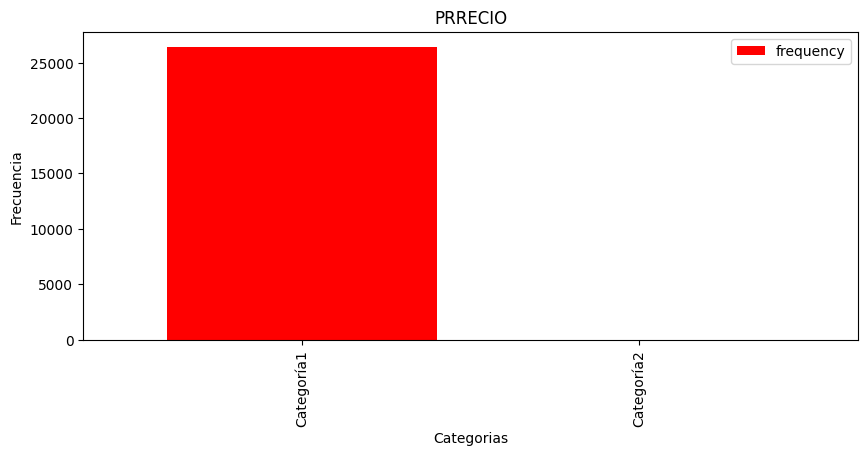

In [194]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "red")
plt.title('PRRECIO')
plt.xlabel('Categorias')
plt.ylabel('Frecuencia')

In [195]:
Min = data["maximum_nights_avg_ntm"].min()  
Max = data["maximum_nights_avg_ntm"].max()  
Limites = [Min,Max]
Limites

[1.0, 1825.0]

In [196]:
#Calcula el rango
R = Max - Min
R

1824.0

In [197]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [198]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

116.25512408907578

In [199]:
# Ver resultado
intervalos = np.linspace(0.0, 1.0, 12) #Número de clases más uno
intervalos

array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
       0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
       0.90909091, 1.        ])

In [200]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [201]:
data["maximum_nights_avg_ntm"] = pd.cut(x = data["maximum_nights_avg_ntm"], bins = intervalos, labels = categorias)
data["maximum_nights_avg_ntm"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
26577    NaN
26578    NaN
26579    NaN
26580    NaN
26581    NaN
Name: maximum_nights_avg_ntm, Length: 26482, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [202]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["maximum_nights_avg_ntm"])
data1

maximum_nights_avg_ntm  frequency  percentage  cumulative_perc
0             Categoría11         13    0.000491              1.0
1              Categoría1          0    0.000000              1.0
2              Categoría2          0    0.000000              1.0
3              Categoría3          0    0.000000              1.0
4              Categoría4          0    0.000000              1.0
5              Categoría5          0    0.000000              1.0
6              Categoría6          0    0.000000              1.0
7              Categoría7          0    0.000000              1.0
8              Categoría8          0    0.000000              1.0
9              Categoría9          0    0.000000              1.0
10            Categoría10          0    0.000000              1.0

In [203]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table7 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table7

maximum_nights_avg_ntm  frequency
0             Categoría11         13
1              Categoría1          0
2              Categoría2          0
3              Categoría3          0
4              Categoría4          0
5              Categoría5          0
6              Categoría6          0
7              Categoría7          0
8              Categoría8          0
9              Categoría9          0
10            Categoría10          0

In [204]:
filtro7 = table7[table7['frequency'] > 1]
filtro7

maximum_nights_avg_ntm  frequency
0            Categoría11         13

In [205]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro7.set_index("maximum_nights_avg_ntm")
Filtro_index

frequency
maximum_nights_avg_ntm           
Categoría11                    13

<Axes: xlabel='maximum_nights_avg_ntm'>

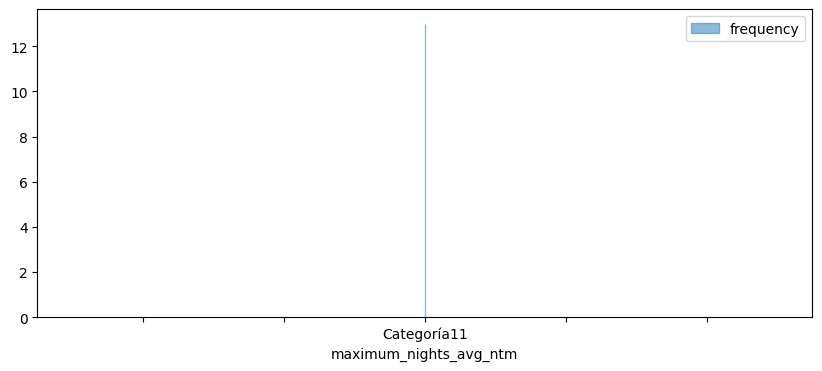

In [206]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha = 0.5)

In [207]:
Min = data["availability_365"].min()  
Max = data["availability_365"].max()  
Limites = [Min,Max]
Limites

[0, 365]

In [208]:
#Calcula el rango
R = Max - Min
R

365

In [209]:
n=26582

In [210]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [211]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

23.263772090193346

In [212]:
# Ver resultado
intervalos = np.linspace(0, 365, 12) #Número de clases más uno
intervalos

array([  0.        ,  33.18181818,  66.36363636,  99.54545455,
       132.72727273, 165.90909091, 199.09090909, 232.27272727,
       265.45454545, 298.63636364, 331.81818182, 365.        ])

In [213]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [214]:
data["availability_365"] = pd.cut(x = data["availability_365"], bins = intervalos, labels = categorias)
data["availability_365"]

0        Categoría11
1        Categoría10
2        Categoría10
3         Categoría8
4         Categoría9
            ...     
26577    Categoría11
26578     Categoría6
26579     Categoría6
26580     Categoría6
26581     Categoría5
Name: availability_365, Length: 26482, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [215]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["availability_365"])
data1

availability_365  frequency  percentage  cumulative_perc
0       Categoría11       7738    0.292198         0.320653
1       Categoría10       2753    0.103957         0.434734
2        Categoría9       2384    0.090023         0.533524
3        Categoría8       2111    0.079715         0.621001
4        Categoría3       2101    0.079337         0.708064
5        Categoría5       1430    0.053999         0.767321
6        Categoría6       1416    0.053470         0.825999
7        Categoría2       1343    0.050714         0.881651
8        Categoría1        995    0.037573         0.922882
9        Categoría7        955    0.036062         0.962456
10       Categoría4        906    0.034212         1.000000

In [216]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table8 = data1.drop(['percentage'], axis=1)
table8

availability_365  frequency  cumulative_perc
0       Categoría11       7738         0.320653
1       Categoría10       2753         0.434734
2        Categoría9       2384         0.533524
3        Categoría8       2111         0.621001
4        Categoría3       2101         0.708064
5        Categoría5       1430         0.767321
6        Categoría6       1416         0.825999
7        Categoría2       1343         0.881651
8        Categoría1        995         0.922882
9        Categoría7        955         0.962456
10       Categoría4        906         1.000000

In [217]:
filtro8 = table8[table8['frequency'] > 1000]
filtro8

availability_365  frequency  cumulative_perc
0      Categoría11       7738         0.320653
1      Categoría10       2753         0.434734
2       Categoría9       2384         0.533524
3       Categoría8       2111         0.621001
4       Categoría3       2101         0.708064
5       Categoría5       1430         0.767321
6       Categoría6       1416         0.825999
7       Categoría2       1343         0.881651

In [218]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro8.set_index("availability_365")
Filtro_index

frequency  cumulative_perc
availability_365                            
Categoría11            7738         0.320653
Categoría10            2753         0.434734
Categoría9             2384         0.533524
Categoría8             2111         0.621001
Categoría3             2101         0.708064
Categoría5             1430         0.767321
Categoría6             1416         0.825999
Categoría2             1343         0.881651

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

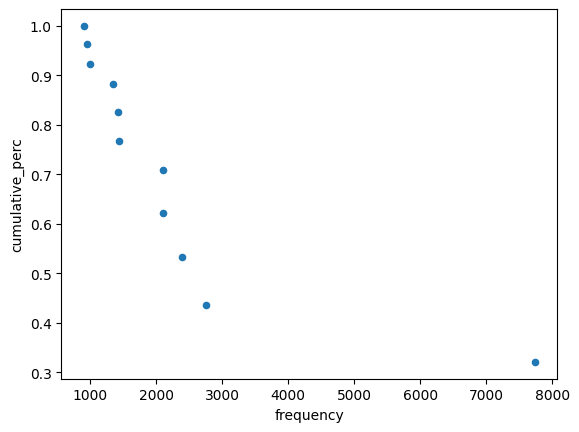

In [219]:
#Realizamos grafico de dispersión del dataframe filtrado
table8.plot("frequency", "cumulative_perc", kind="scatter")

In [220]:
Min = data["number_of_reviews"].min()  
Max = data["number_of_reviews"].max()  
Limites = [Min,Max]
Limites

[0.0, 135.0]

In [221]:
#Calcula el rango
R = Max - Min
R

135.0

In [222]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [223]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

8.60440885527699

In [224]:
# Ver resultado
intervalos = np.linspace(0, 1282, 12) #Número de clases más uno
intervalos

array([   0.        ,  116.54545455,  233.09090909,  349.63636364,
        466.18181818,  582.72727273,  699.27272727,  815.81818182,
        932.36363636, 1048.90909091, 1165.45454545, 1282.        ])

In [225]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [226]:
data["number_of_reviews"] = pd.cut(x = data["number_of_reviews"], bins = intervalos, labels = categorias)
data["number_of_reviews"]


0               NaN
1        Categoría1
2        Categoría1
3        Categoría2
4        Categoría1
            ...    
26577           NaN
26578           NaN
26579           NaN
26580           NaN
26581           NaN
Name: number_of_reviews, Length: 26482, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [227]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["number_of_reviews"])
data1

number_of_reviews  frequency  percentage  cumulative_perc
0         Categoría1      22216    0.838909         0.972381
1         Categoría2        631    0.023828         1.000000
2         Categoría3          0    0.000000         1.000000
3         Categoría4          0    0.000000         1.000000
4         Categoría5          0    0.000000         1.000000
5         Categoría6          0    0.000000         1.000000
6         Categoría7          0    0.000000         1.000000
7         Categoría8          0    0.000000         1.000000
8         Categoría9          0    0.000000         1.000000
9        Categoría10          0    0.000000         1.000000
10       Categoría11          0    0.000000         1.000000

In [228]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table9 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table9

number_of_reviews  frequency
0         Categoría1      22216
1         Categoría2        631
2         Categoría3          0
3         Categoría4          0
4         Categoría5          0
5         Categoría6          0
6         Categoría7          0
7         Categoría8          0
8         Categoría9          0
9        Categoría10          0
10       Categoría11          0

In [229]:
filtro9 = table9[table9['frequency'] > 10]
filtro9

number_of_reviews  frequency
0        Categoría1      22216
1        Categoría2        631

In [230]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro9.set_index("number_of_reviews")
Filtro_index


frequency
number_of_reviews           
Categoría1             22216
Categoría2               631

<Axes: xlabel='number_of_reviews'>

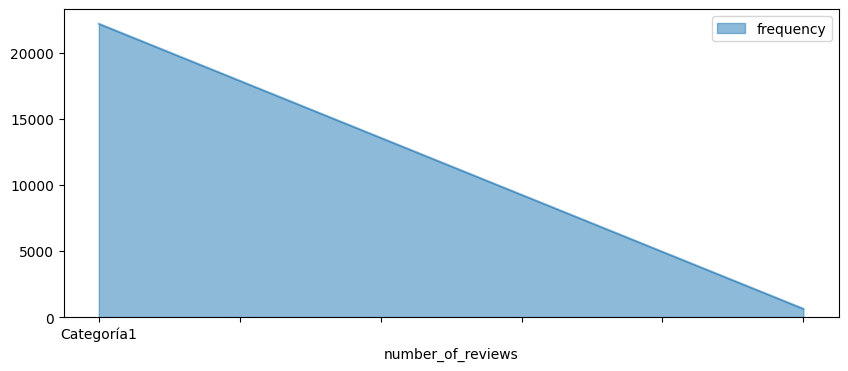

In [231]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha = 0.5)

In [232]:
Min = data["review_scores_location"].min()  
Max = data["review_scores_location"].max()  
Limites = [Min,Max]
Limites

[4.53, 5.0]

In [233]:
#Calcula el rango
R = Max - Min
R

0.46999999999999975

In [234]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni


15.689631010177528

In [235]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.029956090088742098

In [236]:
# Ver resultado
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [237]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [238]:
data["review_scores_location"] = pd.cut(x = data["review_scores_location"], bins = intervalos, labels = categorias)
data["review_scores_location"]


0        Categoría11
1        Categoría11
2        Categoría11
3        Categoría11
4        Categoría11
            ...     
26577    Categoría11
26578    Categoría11
26579    Categoría11
26580    Categoría11
26581    Categoría11
Name: review_scores_location, Length: 26482, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [239]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_location"])
data1

review_scores_location  frequency  percentage  cumulative_perc
0             Categoría11      25640    0.968205         0.968205
1             Categoría10        842    0.031795         1.000000
2              Categoría1          0    0.000000         1.000000
3              Categoría2          0    0.000000         1.000000
4              Categoría3          0    0.000000         1.000000
5              Categoría4          0    0.000000         1.000000
6              Categoría5          0    0.000000         1.000000
7              Categoría6          0    0.000000         1.000000
8              Categoría7          0    0.000000         1.000000
9              Categoría8          0    0.000000         1.000000
10             Categoría9          0    0.000000         1.000000

In [240]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table10 = data1.drop(['percentage'], axis=1)
table10

review_scores_location  frequency  cumulative_perc
0             Categoría11      25640         0.968205
1             Categoría10        842         1.000000
2              Categoría1          0         1.000000
3              Categoría2          0         1.000000
4              Categoría3          0         1.000000
5              Categoría4          0         1.000000
6              Categoría5          0         1.000000
7              Categoría6          0         1.000000
8              Categoría7          0         1.000000
9              Categoría8          0         1.000000
10             Categoría9          0         1.000000

In [241]:
filtro10 = table10[table10['frequency'] > 20]
filtro10

review_scores_location  frequency  cumulative_perc
0            Categoría11      25640         0.968205
1            Categoría10        842         1.000000

In [242]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro10.set_index("review_scores_location")
Filtro_index

frequency  cumulative_perc
review_scores_location                            
Categoría11                 25640         0.968205
Categoría10                   842         1.000000

Text(0, 0.5, 'Frecuencia')

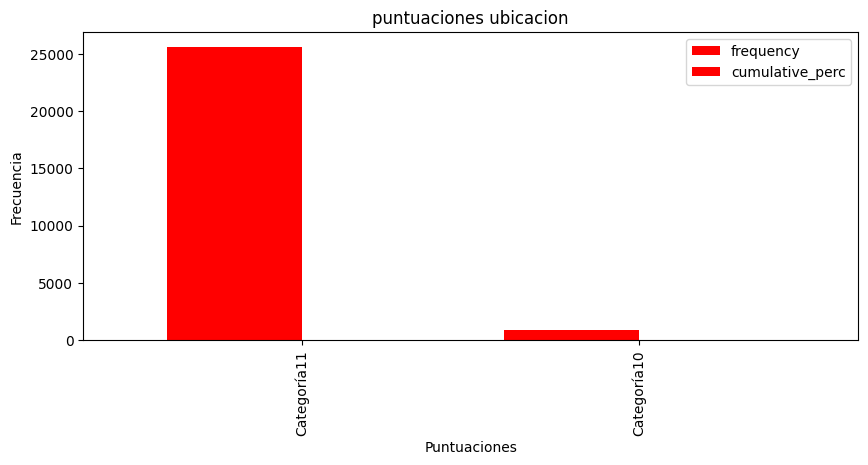

In [243]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "red")
plt.title('puntuaciones ubicacion')
plt.xlabel('Puntuaciones')
plt.ylabel('Frecuencia')

In [244]:
Min = data["review_scores_value"].min()  
Max = data["review_scores_value"].max()  
Limites = [Min,Max]
Limites

[4.28, 5.0]

In [245]:
#Calcula el rango
R = Max - Min
R

0.7199999999999998

In [246]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [247]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.04589018056147727

In [248]:
# Ver resultado
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [249]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [250]:
data["review_scores_value"] = pd.cut(x = data["review_scores_value"], bins = intervalos, labels = categorias)
data["review_scores_value"]

0        Categoría10
1        Categoría10
2        Categoría11
3        Categoría11
4        Categoría11
            ...     
26577    Categoría11
26578    Categoría11
26579    Categoría11
26580    Categoría11
26581    Categoría11
Name: review_scores_value, Length: 26482, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [251]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_value"])
data1

review_scores_value  frequency  percentage  cumulative_perc
0          Categoría11      22509    0.849974         0.849974
1          Categoría10       3973    0.150026         1.000000
2           Categoría1          0    0.000000         1.000000
3           Categoría2          0    0.000000         1.000000
4           Categoría3          0    0.000000         1.000000
5           Categoría4          0    0.000000         1.000000
6           Categoría5          0    0.000000         1.000000
7           Categoría6          0    0.000000         1.000000
8           Categoría7          0    0.000000         1.000000
9           Categoría8          0    0.000000         1.000000
10          Categoría9          0    0.000000         1.000000

In [252]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table11 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table11

review_scores_value  frequency
0          Categoría11      22509
1          Categoría10       3973
2           Categoría1          0
3           Categoría2          0
4           Categoría3          0
5           Categoría4          0
6           Categoría5          0
7           Categoría6          0
8           Categoría7          0
9           Categoría8          0
10          Categoría9          0

In [253]:

filtro11 = table11[table11['frequency'] > 30]
filtro11

review_scores_value  frequency
0         Categoría11      22509
1         Categoría10       3973

In [254]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro11.set_index("review_scores_value")
Filtro_index

frequency
review_scores_value           
Categoría11              22509
Categoría10               3973

<Axes: xlabel='review_scores_value'>

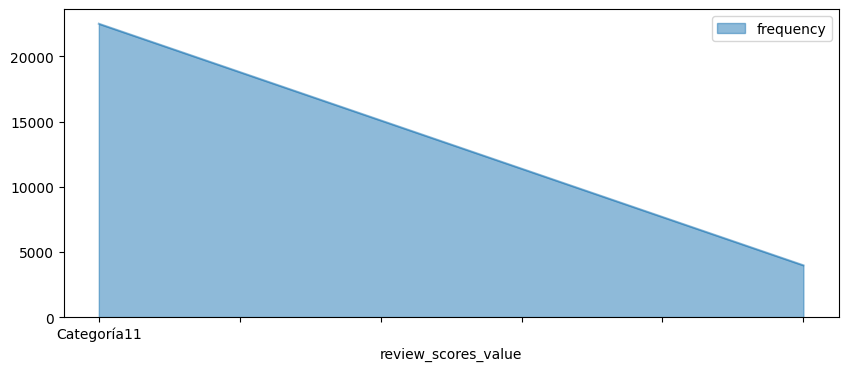

In [255]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha = 0.5)

In [256]:
Min = data["reviews_per_month"].min()  
Max = data["reviews_per_month"].max()  
Limites = [Min,Max]
Limites

[0.01, 4.72]

In [257]:
#Calcula el rango
R = Max - Min
R

4.71

In [258]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [259]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.3001982645063306

In [260]:
intervalos = np.linspace(0.01, 38.67, 12) #Número de clases más uno
intervalos

array([1.00000000e-02, 3.52454545e+00, 7.03909091e+00, 1.05536364e+01,
       1.40681818e+01, 1.75827273e+01, 2.10972727e+01, 2.46118182e+01,
       2.81263636e+01, 3.16409091e+01, 3.51554545e+01, 3.86700000e+01])

In [261]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [262]:
data["reviews_per_month"] = pd.cut(x = data["reviews_per_month"], bins = intervalos, labels = categorias)
data["reviews_per_month"]

0        Categoría1
1        Categoría1
2        Categoría1
3        Categoría1
4        Categoría1
            ...    
26577    Categoría1
26578    Categoría1
26579    Categoría1
26580    Categoría1
26581    Categoría1
Name: reviews_per_month, Length: 26482, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [263]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["reviews_per_month"])
data1

reviews_per_month  frequency  percentage  cumulative_perc
0         Categoría1      24840    0.937996         0.940339
1         Categoría2       1576    0.059512         1.000000
2         Categoría3          0    0.000000         1.000000
3         Categoría4          0    0.000000         1.000000
4         Categoría5          0    0.000000         1.000000
5         Categoría6          0    0.000000         1.000000
6         Categoría7          0    0.000000         1.000000
7         Categoría8          0    0.000000         1.000000
8         Categoría9          0    0.000000         1.000000
9        Categoría10          0    0.000000         1.000000
10       Categoría11          0    0.000000         1.000000

In [264]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table12 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table12

reviews_per_month  frequency
0         Categoría1      24840
1         Categoría2       1576
2         Categoría3          0
3         Categoría4          0
4         Categoría5          0
5         Categoría6          0
6         Categoría7          0
7         Categoría8          0
8         Categoría9          0
9        Categoría10          0
10       Categoría11          0

In [265]:
filtro12 = table12[table12['frequency'] > 2]
filtro12

reviews_per_month  frequency
0        Categoría1      24840
1        Categoría2       1576

In [266]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro12.set_index("reviews_per_month")
Filtro_index


frequency
reviews_per_month           
Categoría1             24840
Categoría2              1576

Text(0, 0.5, 'Frecuencia')

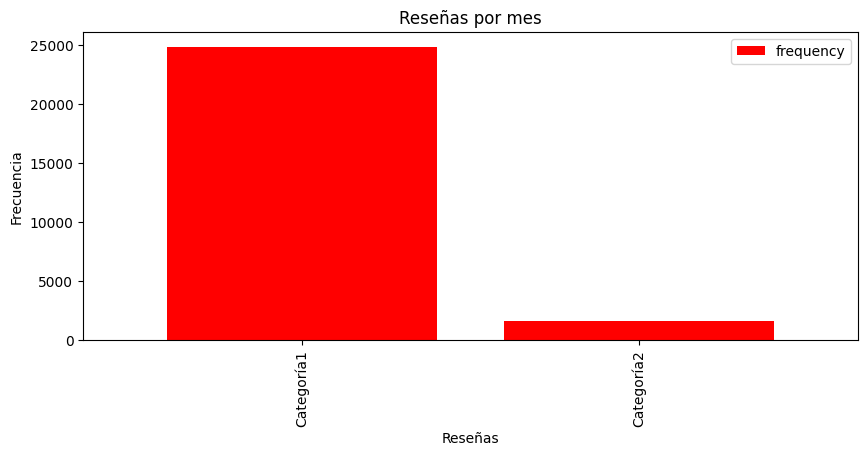

In [267]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "red")
plt.title('Reseñas por mes')
plt.xlabel('Reseñas')
plt.ylabel('Frecuencia')

In [268]:
Min = data["review_scores_communication"].min()  
Max = data["review_scores_communication"].max()  
Limites = [Min,Max]
Limites

[4.58, 5.0]

In [269]:
#Calcula el rango
R = Max - Min
R

0.41999999999999993

In [270]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [271]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.026769271994195078

In [272]:
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [273]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [274]:
data["review_scores_communication"] = pd.cut(x = data["review_scores_communication"], bins = intervalos, labels = categorias)
data["review_scores_communication"]

0        Categoría11
1        Categoría11
2        Categoría11
3        Categoría11
4        Categoría11
            ...     
26577    Categoría11
26578    Categoría11
26579    Categoría11
26580    Categoría11
26581    Categoría11
Name: review_scores_communication, Length: 26482, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [275]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_communication"])
data1

review_scores_communication  frequency  percentage  cumulative_perc
0                  Categoría11      26074    0.984593         0.984593
1                  Categoría10        408    0.015407         1.000000
2                   Categoría1          0    0.000000         1.000000
3                   Categoría2          0    0.000000         1.000000
4                   Categoría3          0    0.000000         1.000000
5                   Categoría4          0    0.000000         1.000000
6                   Categoría5          0    0.000000         1.000000
7                   Categoría6          0    0.000000         1.000000
8                   Categoría7          0    0.000000         1.000000
9                   Categoría8          0    0.000000         1.000000
10                  Categoría9          0    0.000000         1.000000

In [276]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table13 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table13

review_scores_communication  frequency
0                  Categoría11      26074
1                  Categoría10        408
2                   Categoría1          0
3                   Categoría2          0
4                   Categoría3          0
5                   Categoría4          0
6                   Categoría5          0
7                   Categoría6          0
8                   Categoría7          0
9                   Categoría8          0
10                  Categoría9          0

In [277]:
filtro13 = table13[table13['frequency'] > 400]
filtro13

review_scores_communication  frequency
0                 Categoría11      26074
1                 Categoría10        408

In [278]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro13.set_index("review_scores_communication")
Filtro_index

frequency
review_scores_communication           
Categoría11                      26074
Categoría10                        408

<Axes: ylabel='frequency'>

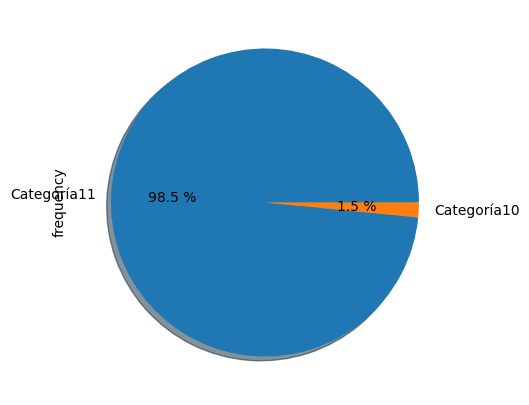

In [279]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [280]:
Min = data["review_scores_checkin"].min()  
Max = data["review_scores_checkin"].max()  
Limites = [Min,Max]
Limites

[4.56, 5.0]

In [281]:
#Calcula el rango
R = Max - Min
R

0.4400000000000004

In [282]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [283]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.02804399923201392

In [284]:
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [285]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [286]:
data["review_scores_checkin"] = pd.cut(x = data["review_scores_checkin"], bins = intervalos, labels = categorias)
data["review_scores_checkin"]


0        Categoría11
1        Categoría11
2        Categoría11
3        Categoría11
4        Categoría11
            ...     
26577    Categoría11
26578    Categoría11
26579    Categoría11
26580    Categoría11
26581    Categoría11
Name: review_scores_checkin, Length: 26482, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [287]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_checkin"])
data1

review_scores_checkin  frequency  percentage  cumulative_perc
0            Categoría11      25857    0.976399         0.976399
1            Categoría10        625    0.023601         1.000000
2             Categoría1          0    0.000000         1.000000
3             Categoría2          0    0.000000         1.000000
4             Categoría3          0    0.000000         1.000000
5             Categoría4          0    0.000000         1.000000
6             Categoría5          0    0.000000         1.000000
7             Categoría6          0    0.000000         1.000000
8             Categoría7          0    0.000000         1.000000
9             Categoría8          0    0.000000         1.000000
10            Categoría9          0    0.000000         1.000000

In [288]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table14 = data1.drop(['percentage'], axis=1)
table14

review_scores_checkin  frequency  cumulative_perc
0            Categoría11      25857         0.976399
1            Categoría10        625         1.000000
2             Categoría1          0         1.000000
3             Categoría2          0         1.000000
4             Categoría3          0         1.000000
5             Categoría4          0         1.000000
6             Categoría5          0         1.000000
7             Categoría6          0         1.000000
8             Categoría7          0         1.000000
9             Categoría8          0         1.000000
10            Categoría9          0         1.000000

In [289]:
filtro14 = table14[table14['frequency'] > 50]
filtro14

review_scores_checkin  frequency  cumulative_perc
0           Categoría11      25857         0.976399
1           Categoría10        625         1.000000

In [290]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro14.set_index("review_scores_checkin")
Filtro_index

frequency  cumulative_perc
review_scores_checkin                            
Categoría11                25857         0.976399
Categoría10                  625         1.000000

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

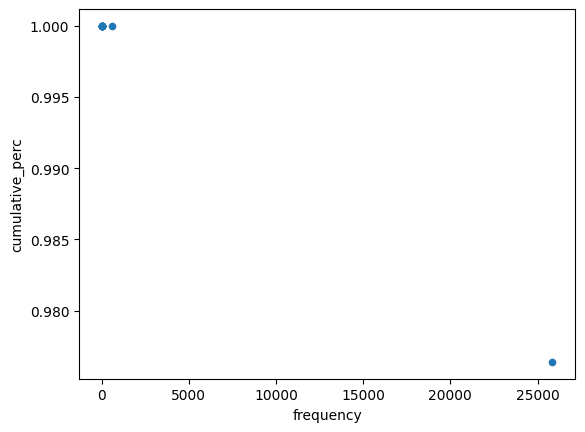

In [291]:
#Realizamos grafico de dispersión del dataframe filtrado
table14.plot("frequency", "cumulative_perc", kind="scatter")

In [292]:
Min = data["review_scores_cleanliness"].min()  
Max = data["review_scores_cleanliness"].max()  
Limites = [Min,Max]
Limites

[4.43, 5.0]

In [293]:
#Calcula el rango
R = Max - Min
R


0.5700000000000003

In [294]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [295]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i


0.0363297262778362

In [296]:
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [297]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [298]:
data["review_scores_cleanliness"] = pd.cut(x = data["review_scores_cleanliness"], bins = intervalos, labels = categorias)
data["review_scores_cleanliness"]


0        Categoría11
1        Categoría11
2        Categoría11
3        Categoría11
4        Categoría11
            ...     
26577    Categoría11
26578    Categoría11
26579    Categoría11
26580    Categoría11
26581    Categoría11
Name: review_scores_cleanliness, Length: 26482, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [299]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_cleanliness"])
data1

review_scores_cleanliness  frequency  percentage  cumulative_perc
0                Categoría11      24175    0.912884         0.912884
1                Categoría10       2307    0.087116         1.000000
2                 Categoría1          0    0.000000         1.000000
3                 Categoría2          0    0.000000         1.000000
4                 Categoría3          0    0.000000         1.000000
5                 Categoría4          0    0.000000         1.000000
6                 Categoría5          0    0.000000         1.000000
7                 Categoría6          0    0.000000         1.000000
8                 Categoría7          0    0.000000         1.000000
9                 Categoría8          0    0.000000         1.000000
10                Categoría9          0    0.000000         1.000000

In [300]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table15 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table15

review_scores_cleanliness  frequency
0                Categoría11      24175
1                Categoría10       2307
2                 Categoría1          0
3                 Categoría2          0
4                 Categoría3          0
5                 Categoría4          0
6                 Categoría5          0
7                 Categoría6          0
8                 Categoría7          0
9                 Categoría8          0
10                Categoría9          0

In [301]:
filtro15 = table15[table15['frequency'] > 30]
filtro15


review_scores_cleanliness  frequency
0               Categoría11      24175
1               Categoría10       2307

In [302]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro15.set_index("review_scores_cleanliness")
Filtro_index

frequency
review_scores_cleanliness           
Categoría11                    24175
Categoría10                     2307

<Axes: xlabel='review_scores_cleanliness'>

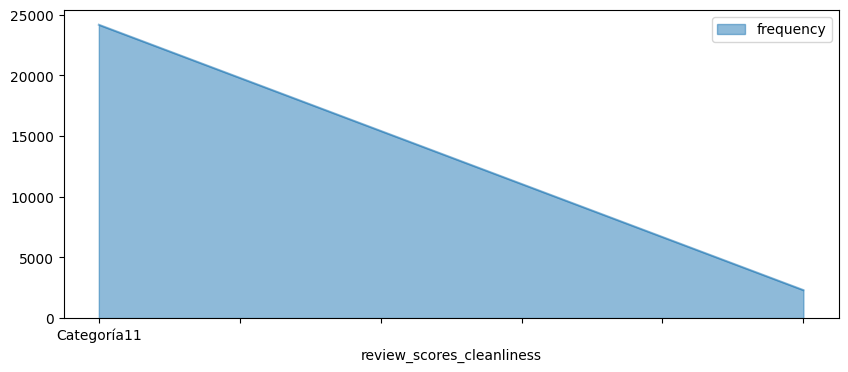

In [303]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha = 0.5)

In [304]:
Min = data["review_scores_accuracy"].min()  
Max = data["review_scores_accuracy"].max()  
Limites = [Min,Max]
Limites


[4.52, 5.0]

In [305]:
#Calcula el rango
R = Max - Min
R

0.4800000000000004

In [306]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [307]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.030593453707651548

In [308]:
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [309]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [310]:
data["review_scores_accuracy"] = pd.cut(x = data["review_scores_accuracy"], bins = intervalos, labels = categorias)
data["review_scores_accuracy"]

0        Categoría11
1        Categoría10
2        Categoría11
3        Categoría11
4        Categoría11
            ...     
26577    Categoría11
26578    Categoría11
26579    Categoría11
26580    Categoría11
26581    Categoría11
Name: review_scores_accuracy, Length: 26482, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [311]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_accuracy"])
data1

review_scores_accuracy  frequency  percentage  cumulative_perc
0             Categoría11      25455    0.961219         0.961219
1             Categoría10       1027    0.038781         1.000000
2              Categoría1          0    0.000000         1.000000
3              Categoría2          0    0.000000         1.000000
4              Categoría3          0    0.000000         1.000000
5              Categoría4          0    0.000000         1.000000
6              Categoría5          0    0.000000         1.000000
7              Categoría6          0    0.000000         1.000000
8              Categoría7          0    0.000000         1.000000
9              Categoría8          0    0.000000         1.000000
10             Categoría9          0    0.000000         1.000000

In [312]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table16 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table16

review_scores_accuracy  frequency
0             Categoría11      25455
1             Categoría10       1027
2              Categoría1          0
3              Categoría2          0
4              Categoría3          0
5              Categoría4          0
6              Categoría5          0
7              Categoría6          0
8              Categoría7          0
9              Categoría8          0
10             Categoría9          0

In [313]:
filtro16 = table16[table2['frequency'] > 70]
filtro16

C:\Users\diego\AppData\Local\Temp\ipykernel_5624\1528683562.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtro16 = table16[table2['frequency'] > 70]


review_scores_accuracy  frequency
0             Categoría11      25455
1             Categoría10       1027
2              Categoría1          0
3              Categoría2          0
4              Categoría3          0
5              Categoría4          0
6              Categoría5          0
7              Categoría6          0
8              Categoría7          0
9              Categoría8          0
10             Categoría9          0

In [314]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro16.set_index("review_scores_accuracy")
Filtro_index

frequency
review_scores_accuracy           
Categoría11                 25455
Categoría10                  1027
Categoría1                      0
Categoría2                      0
Categoría3                      0
Categoría4                      0
Categoría5                      0
Categoría6                      0
Categoría7                      0
Categoría8                      0
Categoría9                      0

Text(0, 0.5, 'Frecuencia')

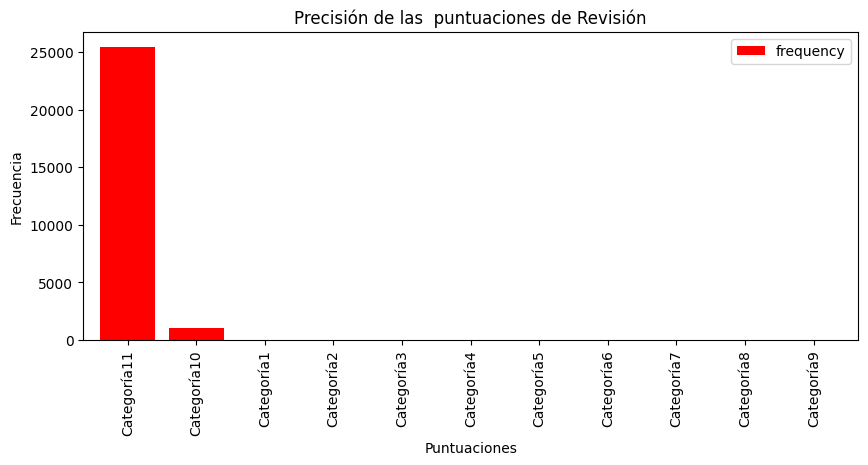

In [315]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "red")
plt.title('Precisión de las  puntuaciones de Revisión')
plt.xlabel('Puntuaciones')
plt.ylabel('Frecuencia')